In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_colwidth', None)

In [364]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer

our_stopwords = set(stopwords.words('english'))
custom_stopwords = set(['bag', 'bad', 'but'])
our_stopwords = our_stopwords.union(custom_stopwords)
ps = PorterStemmer()

In [321]:
data20 = pd.read_csv("debate_transcripts_v3_2020-02-26.csv")

In [322]:
data20['speaker'].loc[5890] = "Julian Castro"
data20['speaker'].loc[5891] = "Julian Castro"

/opt/anaconda3/envs/sarcasm/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [332]:
candidate_names = """Andrew Yang
John Delaney
Elizabeth Warren
Beto O’Rourke
Beto O'Rourke
Pete Buttigieg
Bernie Sanders
Steve Bullock
Michael Bennet
Amy Klobuchar
Kamala Harris
Tulsi Gabbard
Marriane Williamson
Julian Castro
Cory Booker
Joe Biden
Jay Inslee
John Hickenlooper
Tom Steyer
Michael Bloomberg
Eric Swalwell
Bill De Blasio
Kirsten Gillibrand
Seth Moulton
Tim Ryan"""
candidate_names = candidate_names.split("\n")
candidate_set = set(candidate_names)

In [333]:
candidates_bool = [True if i in candidate_set else False for i in data20['speaker']]

In [295]:
data20['speech'] = [re.sub(r' <[0-9]+> ', " ", s) for s in data20['speech']]
data20['speech'] = [re.sub(r'\[[\w :]+\]', " ", s) for s in data20['speech']]
temp = list(data20['speech']).copy()

last_cutoff = None
last_cutoff_spot = -10
last_cutoff_speaker = ""
no_goods = []
for i in range(len(data20['speech'])-1, -1, -1):
    if data20['speech'].iloc[i].startswith("…"):
        print(i)
        last_cutoff = data20['speech'].iloc[i]
        last_cutoff_speaker = data20['speaker'].iloc[i]
        for j in range(1,4):
            if last_cutoff_speaker == data20['speaker'].iloc[i-j]:
                if data20['speech'].iloc[i-j].endswith("-"):
                    data20['speech'].iloc[i-j] = data20['speech'].iloc[i-j] + last_cutoff
                    no_goods.append(i)
                break

# concatenate 2 if they are back to back with same speaker

5520
5514
5509
5507
5502
5501
5494
5488
5477
5472
5464
5439
5437
5421
5351
5345
5333
5241
5200
4929
4868
4863
4845
4728
4726
4712
4710
4706
4701
4690
4682
4671
4666
4654
4648
4638
4624
4622
4597
4579
4569
4559
4557
4550
4544
4527
4517
4512
4510
4508
4501
4495
4493
4488
4484
4387
4384
4362
4350
4345
4339
4331
4328
4244
4225
4113
4111
4104
4088
4070
4006
3988
3960
3899
3883
3864
3862
3860
3858
3803
3562
3560
3533
3529
3498
3495
3466
3441
3242
3122
3120
3112
3100
3089
3081
3079
3077
3063
3061
3052
3051
3041
3021
3005
2987
2986
2984
2977
2976
2964
2961
2959
2931
2920
2899
2894
2858
2854
2843
2841
2835
2833
2832
2830
2823
2821
2813
2805
2799
2773
2759
2751
2749
2731
2727
2589
2338
2243
2005
1879
1820
1755
1712
1693
1635
1633
1610
1575
1567
1499
1370
1369
1368
1148
1094
1092
1090
1089
1066
1065
1051
1042
1038
1024
1016
1010
1005
1002
1001
1000
999
994
992
989
976
765
764
726
683
655
457
291
280
271
261
260
258
133
131
125
117
109
100
98
95
93
86
82
80
78
62
58
50


In [309]:
data20 = data20[~data20.index.isin(no_goods)].reset_index(drop=True)

In [310]:
len(data20)

5737

In [207]:
data20[data20['speech'].str.split().apply(len) >= 20]

,date,debate_name,debate_section,speaker,speech,speaking_time_seconds
0,02-25-2020,South Carolina Democratic Debate Transcript: February 25 Democratic Debate,Part 1: South Carolina Democratic Debate Transcript,Norah ODonnell,"Good evening and welcome, the Democratic presidential primary here in South Carolina. The first primary in the South is just four days away.",8.0
1,02-25-2020,South Carolina Democratic Debate Transcript: February 25 Democratic Debate,Part 1: South Carolina Democratic Debate Transcript,Gayle King,And Super Tuesday is just a week away and this is the biggest primary day of the year as voters in 14 states cast ballots and many of them tell us they have not actually made up their mind. So this debate when you think about it tonight may be the last best chance for the candidates to make their case to South Carolina and Super Tuesday voters.,22.0
2,02-25-2020,South Carolina Democratic Debate Transcript: February 25 Democratic Debate,Part 1: South Carolina Democratic Debate Transcript,Norah ODonnell,"And CBS News is proud to bring you this debate along with our co-sponsors. They are the Democratic National Committee and the Congressional Black Caucus Institute, a nonpartisan organization committed to educating voters and training political leaders.",14.0
3,02-25-2020,South Carolina Democratic Debate Transcript: February 25 Democratic Debate,Part 1: South Carolina Democratic Debate Transcript,Gayle King,"And we are partnering tonight also with Twitter. So you at home can participate in this debate. How do you do that? Send us your questions for the candidates using the Twitter hashtag, DemDebate.",10.0
4,02-25-2020,South Carolina Democratic Debate Transcript: February 25 Democratic Debate,Part 1: South Carolina Democratic Debate Transcript,Norah ODonnell,"Now, here are the rules for the next two hours. When you were asked a question, you will have one minute and 15 seconds to answer and 45 seconds for followups. So lets begin. Senator Sanders, we havent had a national unemployment rate this low for this long in 50 years. Here in South Carolina, the unemployment rate is even lower. How will you convince voters that a democratic socialist can do better than President Trump with the economy?",31.0
...,...,...,...,...,...,...
5903,06-26-2019,Transcript from Night 1 of the 2019 June Democratic Debates,Closing Statements,Beto ORourke,"If were going to be there for them, if were going to confront the challenges that we face, we cant return to the same old approach. Were going to need a new kind of politics, one directed by the urgency of the next generation. Those climate activists who are fighting not just for their future, but for everyones. Those students, not marching for their lives, but for all of ours. Well need a movement like the one that we led in Texas. It renewed our democracy by bringing everyone in, and writing nobody off. Thats how we beat Donald Trump, and thats how we bring this great country together again.",NaN
5907,06-26-2019,Transcript from Night 1 of the 2019 June Democratic Debates,Closing Statements,Elizabeth Warren,"Thank you. Its a great honor to be here. Never in a million years did I think I would stand on a stage like this. I was born and raised in Oklahoma. I have three older brothers. They all joined the military. I had a dream growing up, and my dream was to be a public school teacher. By the time I graduated from high school, my family, my family didnt have the money for a college application, much less a chance for me to go to college.",NaN
5908,06-26-2019,Transcript from Night 1 of the 2019 June Democratic Debates,Closing Statements,Elizabeth Warren,"But I got my chance. It was a 50 dollar a semester commuter college, that was a little slice of government that created some opportunity for a girl. And It opened my life. I am in this fight, because I believe that we can make our government. We can make our economy. We can make our country work, not just for those at the t

In [246]:
count = data20['speech'].str.split().apply(len)
words_left = []
words_left_sec = []
for i in range(3,25):
    temp = data20[count >= i]
    words_left.append(temp.shape[0])
    print(i)
    print(temp['speech'][10:20])
    print('')
    
    
    temp_secs = data20[data20['speaking_time_seconds'] >= i].shape[0]
    words_left_sec.append(temp_secs)

3
12                                                                   Look, the way I see this is that Bernie is winning right now because the Democratic Party is a progressive party and progressive ideas are popular ideas. Even if there are a lot of people on this stage who dont want to say so. But Bernie and I agree on a lot of things, but I think I would make a better president than Bernie. And the reason for that is that getting a progressive agenda enacted is going to be really hard and its going to take someone who digs into the details to make it happen. Bernie and I both wanted to help reign in Wall Street. In 2008, we both got our chance, but I dug in, I fought the big banks, I built the coalitions and I won. Bernie and I both want to see universal healthcare, but Bernies plan doesnt explain how to get there, doesnt show how were going to get enough allies into it and doesnt show enough about how were going to pay for it.
13                                            

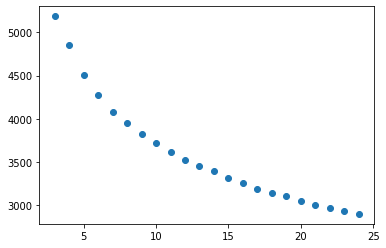

In [247]:
plt.scatter([i for i in range(3,25)], words_left)
plt.show()

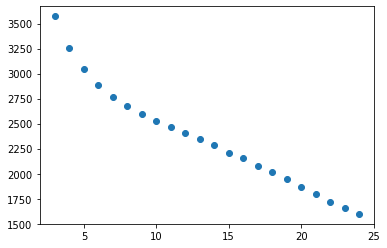

In [248]:
plt.scatter([i for i in range(3,25)], words_left_sec)
plt.show()

In [252]:
temp = data20[count < 12]

In [253]:
temp = temp.sample(frac=200/temp.shape[0])

# 4.5% of the samples contained information we would want to keep

In [216]:
temp

,date,debate_name,debate_section,speaker,speech,speaking_time_seconds
6,02-25-2020,South Carolina Democratic Debate Transcript: February 25 Democratic Debate,Part 1: South Carolina Democratic Debate Transcript,Michael Bloomberg,Senator-,5.0
10,02-25-2020,South Carolina Democratic Debate Transcript: February 25 Democratic Debate,Part 1: South Carolina Democratic Debate Transcript,Norah ODonnell,Senator Warren.,1.0
11,02-25-2020,South Carolina Democratic Debate Transcript: February 25 Democratic Debate,Part 1: South Carolina Democratic Debate Transcript,Pete Buttigieg,"We know what the President what Russia wants, its chaos.",3.0
16,02-25-2020,South Carolina Democratic Debate Transcript: February 25 Democratic Debate,Part 1: South Carolina Democratic Debate Transcript,Norah ODonnell,Mr. Steyer.,2.0
18,02-25-2020,South Carolina Democratic Debate Transcript: February 25 Democratic Debate,Part 1: South Carolina Democratic Debate Transcript,Norah ODonnell,Vice President Biden.,1.0
...,...,...,...,...,...,...
5896,06-26-2019,Transcript from Night 1 of the 2019 June Democratic Debates,Closing Statements,Savannah G.,Thank you Senator.,NaN
5897,06-26-2019,Transcript from Night 1 of the 2019 June Democratic Debates,Closing Statements,Jose D.B.,"Senator Booker, su cuarento y cinco [foreign language 00:07:08].",NaN
5900,06-26-2019,Transcript from Night 1 of the 2019 June Democratic Debates,Closing Statements,Jose D.B.,"Senator, thank you.",NaN
5901,06-26-2019,Transcript from Night 1 of the 2019 June Democratic Debates,Closing Statements,Chuck Todd,"ngressman ORourke, 45 seconds.",NaN


In [262]:
pd.unique(data20.speaker)

array(['Norah O\x92Donnell', 'Gayle King', 'Bernie Sanders',
       'Michael Bloomberg', 'Pete Buttigieg', 'Elizabeth Warren',
       'Tom Steyer', 'Joe Biden', 'Amy Klobuchar', 'Bill Whitaker',
       'Major Garrett', 'Speaker 1', 'Margaret Brennan', 'Lester Holt',
       'Hallie Jackson', 'Chuck Todd', 'Female', 'Moderator',
       'Vanessa Hauc', 'Jon Ralston', 'Helen', 'Moderator 1',
       'Moderator 4', 'Audience', 'George S.', 'Andrew Yang',
       'Linsey Davis', 'David Muir', 'Monica Hernandez', 'Adam Sexton',
       'Devin Dwyer', 'Rachel Scott', 'Announcer', 'Wolf Blitzer',
       'Abby Phillips', 'B. Pfannenstiel', 'Moderator 2', 'Brianne P.',
       'Judy Woodruff', 'Amy Walter', 'Stephanie Sy', 'Speaker 2',
       'Tim Alberta', 'Amna Nawaz', 'Yamiche A.', 'Rachel Maddow',
       'Andrea Mitchell', 'Kamala Harris', 'Cory Booker',
       'Kristen Welker', 'Ashley Parker', 'Tulsi Gabbard', 'Speaker 3',
       'Anderson Cooper', 'Erin Burnett', 'Marc Lacey', 'Julian Castro',

In [356]:
def extract_words(sentence):
    ignore_words = our_stopwords
    words = nltk.word_tokenize(sentence)
    words_cleaned = [ps.stem(''.join(filter(str.isalpha, w)).lower()) for w in words if (w not in ignore_words and not any(map(str.isdigit, w)) and len(w)>2)]
    return words_cleaned  


def tokenize_sentences(sentences):
    words = []
    for sentence in sentences:
        w = extract_words(sentence)
        words.extend(w)
        
    words = sorted(list(set(words)))
    return words


def bagofwords(sentence, words):
    sentence_words = extract_words(sentence)
    # frequency word count
    bag = np.zeros(len(words))
    for sw in sentence_words:
        for i,word in enumerate(words):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag)

In [365]:
vocabulary = tokenize_sentences(data20.speech)

In [342]:
sum(bagofwords("Mr. Steyer, thank you, your time's up. Vice President Biden.", vocabulary))

11.0

In [366]:
vocabulary

['aapi',
 'aaron',
 'abandon',
 'abat',
 'abc',
 'aberr',
 'abhorr',
 'abid',
 'abil',
 'abl',
 'abolish',
 'abolit',
 'abomin',
 'abort',
 'about',
 'abraham',
 'abram',
 'abroad',
 'absent',
 'absolut',
 'absorb',
 'absurd',
 'abundantli',
 'abus',
 'aca',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access',
 'accid',
 'accommod',
 'accomplish',
 'accord',
 'account',
 'accru',
 'accumul',
 'accur',
 'accus',
 'achiev',
 'acknowledg',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'acut',
 'ad',
 'adam',
 'adapt',
 'add',
 'addict',
 'addit',
 'address',
 'adequ',
 'adio',
 'adjust',
 'administ',
 'administr',
 'admir',
 'admiss',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advantag',
 'adversari',
 'advertis',
 'advic',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'aflcio',
 'afraid',
 'africa',
 'african',
 'africanamerican',
 'after',
 'aftermath',
 'a